# Principal Component Analysis (PCA) of the Chemical Search Space

First, we need to calculate the fingerprints of each molecule in our search space. Then using PCA, we can reduce the dimensions to create a plot that shows the chemical diversity. 

In [10]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rcParams['legend.title_fontsize'] = 'x-large' # fontsize of legend title

### Creating 2048-bit fingerprints of all polymers in search space

In [3]:
def morgan_fp(smiles, mon1, mon2):
    try:
        mol = Chem.MolFromSmiles(smiles)
        fp = list(AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048))
    except:
        print('Error with polymer. Monomers are ' + str(mon1) + ' and ' + str(mon2))
        return False
    
    return fp

def make_hex_smiles(mon1_count, mon2_count, df_smiles):
    mon1_smiles = df_smiles.iloc[mon1_count][1]
    mon2_smiles = df_smiles.iloc[mon2_count][1]
    
    SMILES = mon1_smiles + mon2_smiles + mon1_smiles + mon2_smiles + mon1_smiles + mon2_smiles
    
    return SMILES

In [16]:
# imports all monomer SMILES into DataFrame
df_smiles = pd.read_csv('monomer_SMILES_PCA.csv')

# total number of monomers
num_monos = 447

# Start at monomer index 0
mon1 = 0

fps = []
bad_fps_count = 0

# checks to see if monomer is in top 100 
polar_checklist = []
opt_bg_checklist = []
solv_ratio_checklist = []

# iterate through all combinations of monomers
while mon1 < num_monos:
    mon2 = mon1
    while mon2 < num_monos:
        hex_smiles = make_hex_smiles(mon1, mon2, df_smiles)
        fp = morgan_fp(hex_smiles, mon1, mon2)
        if fp == False:
            bad_fps_count +=1
        else:
            fps.append(fp)

            monomers = str([mon1, mon2])
            if monomers in top_polar_df.values:
                polar_checklist.append(1)
            else:
                polar_checklist.append(0)

            if monomers in top_opt_bg_df.values:
                opt_bg_checklist.append(1)
            else:
                opt_bg_checklist.append(0)

            if monomers in top_solv_eng_df.values:
                solv_ratio_checklist.append(1)
            else:
                solv_ratio_checklist.append(0)

        
        mon2 +=1

    print(mon1)
    mon1 +=1

print(bad_fps_count)
print(len(fps))

    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

RDKit ERROR: [17:55:56] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5
[17:55:56] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5

RDKit ERROR: 
RDKit ERROR: [17:55:56] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5
RDKit ERROR: 
RDKit ERROR: [17:55:56] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5
RDKit ERROR: 
RDKit ERROR: [17:55:56] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5
RDKit ERROR: 
RDKit ERROR: [17:55:56] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5
RDKit ERROR: 
RDKit ERROR: [17:55:56] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5
RDKit ERROR: 
RDKit ERROR: [17:55:56] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5
RDKit ERROR: 
RDKit ERROR: [17:55:56] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5
RDKit ERROR: 
RDKit ERROR: [17:55:56] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5
RDKit ERROR: 
RDKit ERROR: [17:55:56] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5
RDKit ERROR: 
RDKit ERROR: [17:55:56] Can't kekulize mol.  Unkekulized a

397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
51
100077


For troubleshooting

In [8]:
'''#hex_smiles = make_hex_smiles(51, 143, df_smiles)
hex_smiles = '[n]1c(C)cc(c1C=C)C=Cc(s1)cc(c(CC)c(CC)2)c1c(s3)c2cc3[n]1c(C)cc(c1C=C)C=Cc(s1)cc(c(CC)c(CC)2)c1c(s3)c2cc3[n]1c(C)cc(c1C=C)C=Cc(s1)cc(c(CC)c(CC)2)c1c(s3)c2cc3'

mol = Chem.MolFromSmiles(hex_smiles)

#print(hex_smiles)
fp = morgan_fp(hex_smiles, 46, 46)'''

Error with polymer. Monomers are 46 and 46


RDKit ERROR: [15:55:04] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5
RDKit ERROR: 
RDKit ERROR: [15:55:04] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5
RDKit ERROR: 
[15:55:04] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5

[15:55:04] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5



Write the fingerprints to a text file so we do not need to re-run the code in the future

In [19]:
# commented out so we do not overwrite the file
'''with open('fps.txt', 'w') as f:
    for x in range(len(fps)):
        f.write("%s %s %s %s\n" % (fps[x], polar_checklist[x], opt_bg_checklist[x], solv_ratio_checklist[x]))'''

Reload the fingerprints into list

In [3]:
fps = []
polar_checklist = []
opt_bg_checklist = []
solv_ratio_checklist = []

with open('fps.txt', 'r') as f:
    for line in f:
        fp = []

        characters = line.strip().split()
        len_chars = len(characters)

        chars = list(characters[0])
        fp.append(int(chars[1]))

        for x in range(1, len_chars-4):
            chars = list(characters[x])
            fp.append(int(chars[0]))

        chars = list(characters[-4])
        fp.append(int(chars[0]))

        polar_checklist.append(int(characters[-3]))
        opt_bg_checklist.append(int(characters[-2]))
        solv_ratio_checklist.append(int(characters[-1]))

        fps.append(fp)

print(len(solv_ratio_checklist))

100077


### Check if polymer is in top 100 for polarizability, optical bandgap, and solvation ratio

In [3]:
polar_df = pd.read_csv('/ihome/ghutchison/dch45/ga_methods/hexamer_pool/data_files/ranked_polar.csv')
top_polar_df = polar_df[:100]

opt_bg_df = pd.read_csv('/ihome/ghutchison/dch45/ga_methods/hexamer_pool/data_files/ranked_opt_bg.csv')
top_opt_bg_df = opt_bg_df[:100]

solv_eng_df = pd.read_csv('/ihome/ghutchison/dch45/ga_methods/hexamer_pool/data_files/ranked_solv_eng.csv')
top_solv_eng_df = solv_eng_df[:100]


## PCA

In [4]:
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

In [6]:
# creates a PCA object to generate a lower dimensional projection of the data
pca = PCA(n_components=2)
# generates a set of two coordinates
crds = pca.fit_transform(fps)

# create dataframe with coordinates
crds_df = pd.DataFrame(crds,columns=["PC_1","PC_2"])

# print length of dataframe to ensure we have same number of molecules
print(len(crds_df))

# add whether each molecule is in the top 100 for each chemical property
crds_df['top_polar'] = polar_checklist
crds_df['top_optbg'] = opt_bg_checklist
crds_df['top_solv'] = solv_ratio_checklist
crds_df.head()

100077


,PC_1,PC_2,top_polar,top_optbg,top_solv
0,-0.239298,1.732976,0,0,0
1,0.200992,0.063767,0,0,0
2,0.573561,-0.866265,0,0,0
3,2.043251,-0.504789,0,0,0
4,0.737164,-0.663237,0,0,0


Plot the principal components. Light blue represents all molecules while red represents the molecules is in the top 100 for polarizability (just an example)

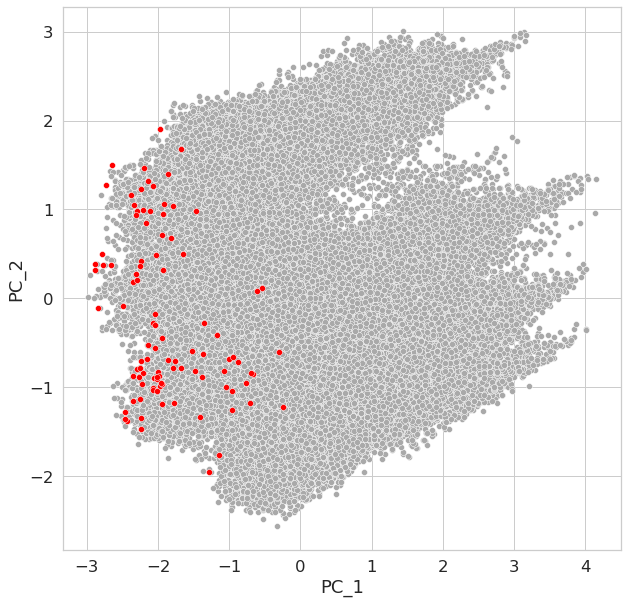

In [11]:
ax = sns.scatterplot(data=crds_df.query("top_polar == 0"),x="PC_1",y="PC_2", color='darkgrey')
ax = sns.scatterplot(data=crds_df.query("top_polar == 1"),x="PC_1",y="PC_2", color = 'red')


In [24]:
# Prints the fraction of the overall variance represented by 2 components
print(np.sum(pca.explained_variance_ratio_))

0.06747266618129753


Using the first two principial components only represents 6.7% of the overall variance. We can use a dimensionality reduction method to capture more variance like t-distributed stochastic neighbor embedding (t-sne). In a separate script, we ran PCA on 2-50 components, which showed increasing the components increased the amount of variance represented.

We will now run TSNE on the dataset, which works much faster on lower dimensional data. First use PCA to reduce the dimensionality

In [12]:
# creates a PCA object to generate a lower dimensional projection of the data
pca = PCA(n_components=50)
# generates a set of two coordinates
crds = pca.fit_transform(fps)

# use TSNE
crds_embedded = TSNE(n_components=2).fit_transform(crds)

# create dataframe with coordinates
tsne_df = pd.DataFrame(crds_embedded,columns=["X","Y"])


# add whether each molecule is in the top 100 for each chemical property
tsne_df['top_polar'] = polar_checklist
tsne_df['top_optbg'] = opt_bg_checklist
tsne_df['top_solv'] = solv_ratio_checklist
tsne_df.head()

/ihome/ghutchison/blp62/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/ihome/ghutchison/blp62/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,X,Y,top_polar,top_optbg,top_solv
0,23.329882,-3.659285,0,0,0
1,10.056405,-9.741098,0,0,0
2,10.364206,-10.996073,0,0,0
3,28.364271,-20.095207,0,0,0
4,9.720943,-10.342021,0,0,0


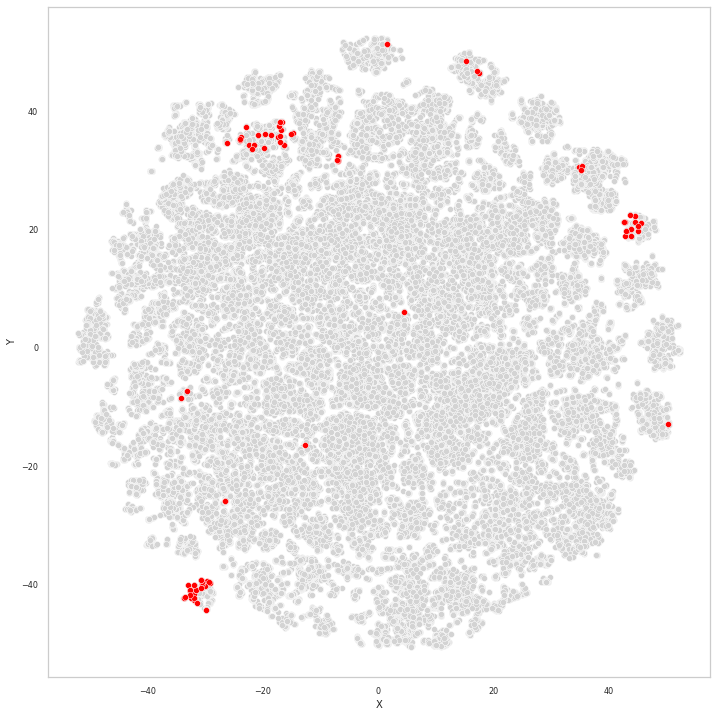

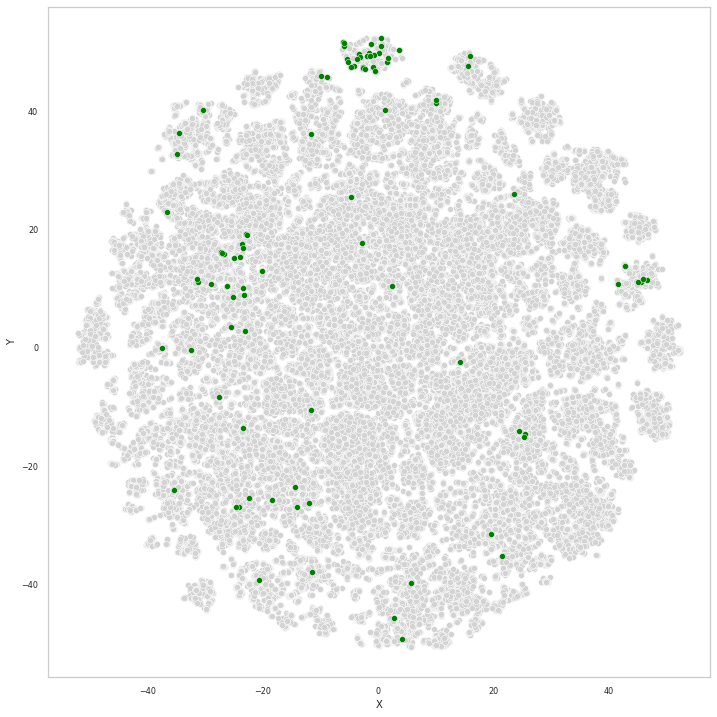

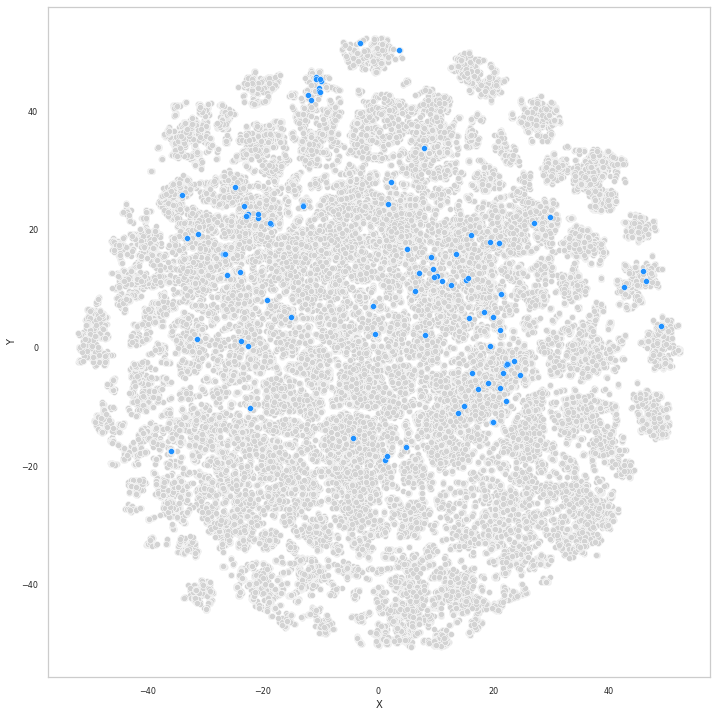

In [23]:
# polarizabilitiy
fig, ax1 = plt.subplots()
sns.scatterplot(data=tsne_df.query("top_polar == 0"),x="X",y="Y", color='lightgrey', ax=ax1)
sns.scatterplot(data=tsne_df.query("top_polar == 1"),x="X",y="Y", color = 'red', ax=ax1)
ax1.grid(False)
plt.tight_layout()

plt.savefig('tsne_polar.pdf', dpi=600)
plt.savefig('tsne_polar.png', dpi=600)

# Optical bandgap
fig, ax2 = plt.subplots()
sns.scatterplot(data=tsne_df.query("top_optbg == 0"),x="X",y="Y", color='lightgrey', ax=ax2)
sns.scatterplot(data=tsne_df.query("top_optbg == 1"),x="X",y="Y", color = 'green', ax=ax2)
ax2.grid(False)
plt.tight_layout()

plt.savefig('tsne_optbg.pdf', dpi=600)
plt.savefig('tsne_optbg.png', dpi=600)

# Solvation Energy
fig, ax3 = plt.subplots()
sns.scatterplot(data=tsne_df.query("top_solv == 0"),x="X",y="Y", color='lightgrey', ax=ax3)
sns.scatterplot(data=tsne_df.query("top_solv == 1"),x="X",y="Y", color = 'dodgerblue', ax=ax3)
ax3.grid(False)
plt.tight_layout()

plt.savefig('tsne_solv_eng.pdf', dpi=600)
plt.savefig('tsne_solv_eng.png', dpi=600)


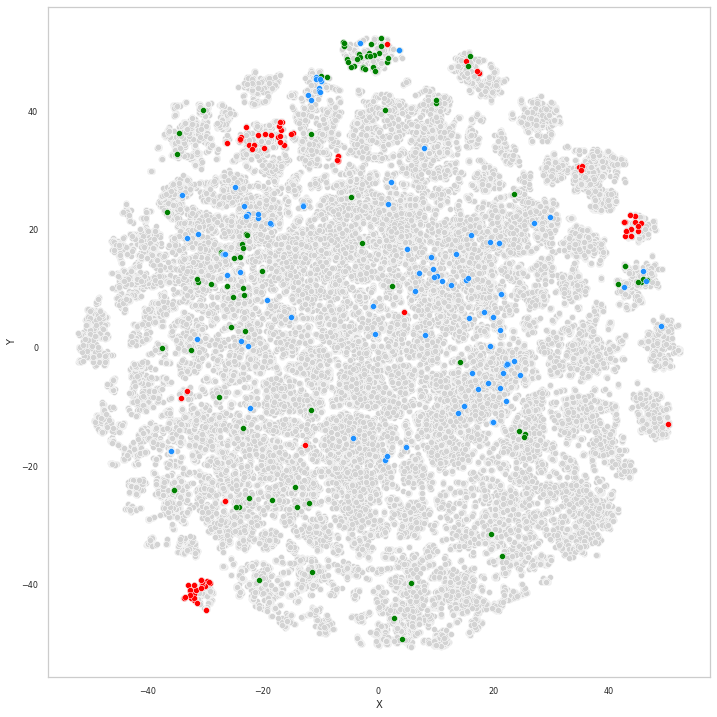

In [26]:
# polarizabilitiy
fig, ax1 = plt.subplots()
sns.scatterplot(data=tsne_df.query("top_polar == 0"),x="X",y="Y", color='lightgrey', ax=ax1)
sns.scatterplot(data=tsne_df.query("top_polar == 1"),x="X",y="Y", color = 'red', ax=ax1)
sns.scatterplot(data=tsne_df.query("top_optbg == 1"),x="X",y="Y", color = 'green', ax=ax1)
sns.scatterplot(data=tsne_df.query("top_solv == 1"),x="X",y="Y", color = 'dodgerblue', ax=ax1)
ax1.grid(False)
plt.tight_layout()

plt.savefig('tsne_all3_props.pdf', dpi=600)
plt.savefig('tsne_all3_props.png', dpi=600)

In [25]:
tsne_df.to_csv('tnse_coords.csv')

# Adding chemical properties

Can we make t-sne more accurate by adding chemical proprties obtained through GFN2, and sTD-DFT-xtb?

Properties added are HOMO, LUMO, polarizability, optical bandgap, solvation energy in hexane, and solvation energy in water for each monomer. Since each hexamer is made of 2 monomers, each hexamer has 2 values for each.

In [12]:
descriptors = pd.read_csv('tnse_coords_chem_props.csv')
descriptors

,Unnamed: 0,X,Y,top_polar,top_optbg,top_solv
0,0,1.803998,-24.314087,0,0,0
1,1,-28.798040,12.300335,0,0,0
2,2,-33.935905,20.178732,0,0,0
3,3,24.272860,8.969853,0,0,0
4,4,1.510532,-24.116455,0,0,0
...,...,...,...,...,...,...
100072,100072,29.551704,-9.237634,0,0,0
100073,100073,25.301807,27.507465,0,0,0
100074,100074,19.866077,-21.846481,0,0,0
100075,100075,11.016242,19.335350,0,0,0


In [ ]:
umap_model = umap.UMAP(metric = "jaccard",
                      n_neighbors = 25,
                      n_components = 2,
                      low_memory = False,
                      min_dist = 0.001)
X_umap = umap_model.fit_transform(ecfp_descriptors)
bbbp["UMAP_0"], bbbp["UMAP_1"] = X_umap[:,0], X_umap[:,1]